# ML Task 1- Python Environment

### CASTILLO, ANJELICA M.


In [16]:
# pip install pandas
# pip install matplotlib
# pip install sklearn

# Import Libraries

In [38]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns


# Step 1: Load the dataset
### Dataset: Netflix Movies and TV Shows 

In [ ]:
df = pd.read_csv(r"netflix_titles.csv")

# Step 2: Initial Exploration

In [19]:
#Print the dataframe to see if it loaded properly
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [20]:
#displays the first five rows of the DataFrame, allowing for a quick preview of the dataset. 
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
 # General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [22]:
## Summary statistics
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


# Step 3: Data Cleaning

In [23]:
# Dropping missing values for simplicity
df.dropna(inplace=True)  

In [24]:
# Removing duplicates based on all columns
df = df.drop_duplicates()

# Step 4: Encoding Categorical Data

In [26]:
#Encoding Categorical for df
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])  # Label encoding 'type' column
print(label_encoder.classes_)

['Movie' 'TV Show']


In [ ]:
# Applies one-hot encoding to the type column and adds the resulting columns to the DataFrame. 
ohe = OneHotEncoder()
type_encoded_df = pd.DataFrame(ohe.fit_transform(df[['type']]).toarray(), columns=ohe.get_feature_names_out())
df = df.join(type_encoded_df)  # One-hot encoding for 'type'

In [ ]:
# Ensure there is no missing data
print(ohe.get_feature_names_out())

['type_Movie' 'type_TV Show']


# Step 5: Mapping Example

In [29]:
ratings_map = {"TV-MA": 1, "R": 2, "PG-13": 3, "PG": 4, "G": 5}  # Example mapping

df['rating_mapped'] = df['rating'].map(ratings_map)  # Mapping ratings to numerical values

# Additional Functions for Better Analysis
def count_unique_values(df, column_name):
    """Counts unique values in a column."""
    return df[column_name].nunique()

print("\nUnique Ratings:", count_unique_values(df, 'rating'))


Unique Ratings: 14


# Step 6: Additional Analysis Functions

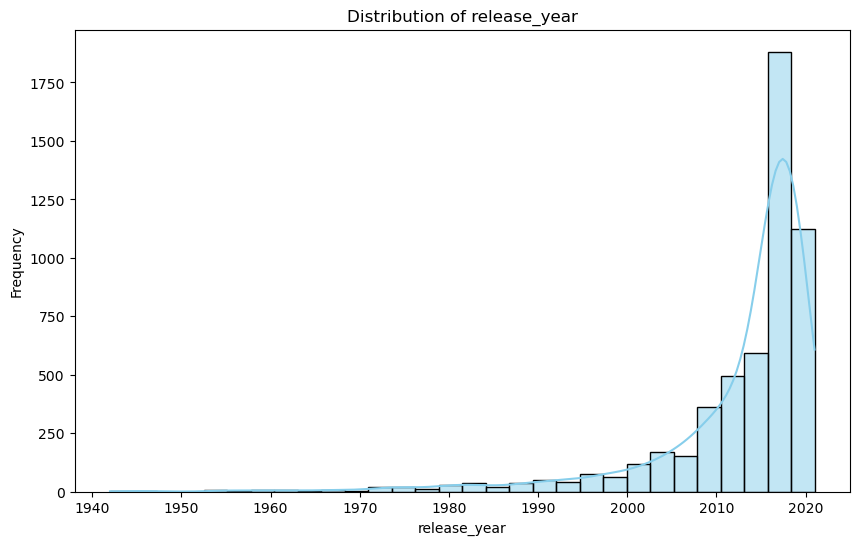

In [31]:
def plot_distribution(df, column_name):
    """Plots the distribution of a numerical column."""
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution of release_year
plot_distribution(df, 'release_year')

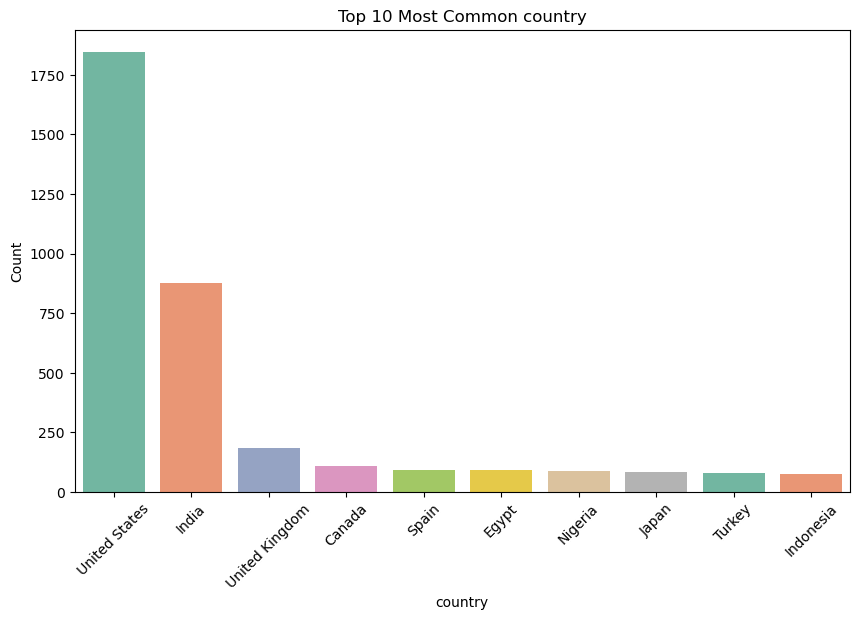

In [37]:
# Plot top 10 most common countries
def plot_top_categories(df, column_name, top_n=10):
    """Plots the top N most common categories of a column."""
    top_categories = df[column_name].value_counts().head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')
    plt.title(f'Top {top_n} Most Common {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_top_categories(df, 'country', top_n=10)

In [35]:
# Function to get the most common genres
def most_common_categories(df, column_name, top_n=10):
    """Returns the most common categories of a column."""
    return df[column_name].value_counts().head(top_n)

# Example: Most common genres (listed_in column contains genres)
display("\nMost Common Genres:")
display(most_common_categories(df, 'listed_in', top_n=5))

'\nMost Common Genres:'

Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Name: listed_in, dtype: int64

# Step 7: Save as HTML File

In [28]:
# df.to_csv('netflix_movies_part2.csv', index=False)